<a href="https://colab.research.google.com/github/sieunrla03/quest_repo/blob/main/DS2%EA%B8%B0_%ED%86%B5%EA%B3%84_%EB%A9%94%EC%9D%B8%ED%80%98%EC%8A%A4%ED%8A%B8_%EC%8B%9C%EC%9D%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install koreanize-matplotlib

In [3]:
# !pip install koreanize-matplotlib
import koreanize_matplotlib

%config InlineBackend.figure_format = 'retina'

In [4]:
df = pd.read_parquet("https://github.com/corazzon/KaggleStruggle/raw/master/online-retail/data/online_retail.gzip")
df.shape

(541909, 8)

In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   InvoiceNo    541909 non-null  category
 1   StockCode    541909 non-null  category
 2   Description  540455 non-null  category
 3   Quantity     541909 non-null  int32   
 4   InvoiceDate  541909 non-null  category
 5   UnitPrice    541909 non-null  float64 
 6   CustomerID   406829 non-null  float32 
 7   Country      541909 non-null  category
dtypes: category(5), float32(1), float64(1), int32(1)
memory usage: 15.1 MB


## 미션 1) 모집단과 표본 추출을 하고 TotalPrice에 대해 비교해 주세요.
데이터셋에서 무작위로 1000개의 표본을 추출하고, 추출된 표본과 전체 데이터셋의 'TotalPrice'에 대해 평균과 표준편차를 비교하세요. \
이를 통해 모집단과 표본의 차이를 설명하고, 중심극한정리가 어떻게 적용되는지 설명하세요.

- pandas 의 sample 을 활용할 수 있으며, pandas 의 기술 통계 기능을 활용해 볼 수 있습니다.

아래의 코드를 활용하세요.

```python
# 주문 날짜 데이터 전처리
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"].astype(str))
df["InvoiceMonth"] = df["InvoiceDate"].dt.month

# 데이터 타입 변경
df["Country"] = df["Country"].astype(str)

# 주문 가격
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]
df.head()
```

In [7]:
# 주문 날짜 데이터 전처리
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"].astype(str))
df["InvoiceMonth"] = df["InvoiceDate"].dt.month

# 데이터 타입 변경
df["Country"] = df["Country"].astype(str)

# 주문 가격
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]
df.head()

# 모집단 분석
population_mean = df['TotalPrice'].mean() # 모집단 평균
population_std = df['TotalPrice'].std() # 모집단 표준편차

# 표본 추출 - 1000개
sample_mean = df.sample(1000)['TotalPrice'].mean() # 표본 평균
sample_std = df.sample(1000)['TotalPrice'].std() # 표본 표준편차

print("모집단 평균:", population_mean)
print("모집단 표준편차:", population_std)
print("표본 평균:", sample_mean)
print("표본 표준편차:", sample_std)

모집단 평균: 17.98779487699964
모집단 표준편차: 378.8108235059747
표본 평균: 18.60782
표본 표준편차: 37.35066281176383


## 추출된 표본과 전체 데이터셋의 'TotalPrice'에 대해 평균과 표준편차를 비교하세요.이를 통해 모집단과 표본의 차이를 설명하고, 중심극한정리가 어떻게 적용되는지 설명하세요.
- 평균 비교
  - 모집단 평균은 17.9878, 표본 평균은 15.0922
  - 표본 평균이 모집단 평균보다 조금 더 작게 나왔다. 표본이 모집단의 특성을 반영하지 못했다는 결과이지만 그리 많이 차이가 나진 않으므로 표본이 모집단의 특성을 어느 정도 반영한다고 해석할 수 있겠음
- 표준편차 비교
   - 모집단 표준편차는 378.8108, 표본 표준편차는 206.4233
   - 표준편차도 평균과 같이 표본 표준편차가 모집단 표준편차보다 작다. 하지만 이것은 표본 크기가 모집단에 비해서 작기 때문일 수 있고 일반적으로 표본의 표준편차는 모집단 표준편차보다 작게 나타나는 경향이 있다고 한다.
- 모집단과 표본의 차이
  - 위에서 이미 비교를 마쳤지만 정리하자면
  - 표본은 모집단의 일부라서 표본의 평균과 표준편차는 모집단의 평균과 표준편차랑 정확히 일치할 순 없음
  - 표본의 크기가 클수록 표본의 통계량은 모집단의 통계량과 가까워짐
- 중심극한정리가 어떻게 적용되는지
    - 표본의 크기가 일정수치 클 경우, 표본 평균의 분포는 모집단의 분포가 어떤 형태이든 정규 분포에 가까워진다.
    - 이를 통해서 모집단의 평균에 대한 추론 가능

## 미션2) 'Country' 변수를 바탕으로 가장 빈도가 높은 두 개의 국가를 선택하고, 각 국가의 'TotalPrice' 평균에 차이가 있는지 검증하세요. 독립표본 t-검정을 사용하여 가설을 설정하고 검정하며, 1종 오류와 2종 오류에 대해 설명하세요.


* 미션 진행 방법
    <br>1) 데이터 로드 후 'TotalPrice'와 'Country' 컬럼을 찾아주세요.
    <br>2) 데이터셋에서 주문이 가장 많은 상위 두 국가를 찾아주세요.
    <br>3) 통계적 검증 수행하기
    <br>4) 각 국가의 'TotalPrice' 평균을 계산하세요.
    <br>5) 독립표본 t-검정을 사용하여 두 국가 간 'TotalPrice' 평균의 차이가 통계적으로 유의미한지 검증하세요. 이 때, scipy.stats 라이브러리의 ttest_ind 함수를 사용할 수 있습니다. equal_var=False 파라미터를 설정하여 두 집단의 분산이 다르다고 가정하세요.
    <br>6) t-통계량과 p-값을 해석하여 결과를 설명하세요. 1종 오류와 2종 오류의 개념을 설명하고, 해당 데이터셋에 적용하여 설명해 주세요.

In [8]:
import pandas as pd
from scipy.stats import ttest_ind

# 데이터셋 불러오기 (데이터셋 경로에 맞게 수정하세요)
# df = pd.read_csv('your_dataset.csv')

# 필요한 칼럼만 선택
df_m1 = df[['TotalPrice', 'Country']]

# 데이터셋에서 주문이 가장 많은 상위 두 국가 찾기
top_countries = df_m1['Country'].value_counts().nlargest(2).index
# nlargest는 구글링해서 찾은 판다스의 함수인데 판다스 공식문서를 인용하자면 '열을 기준으로 내림차순으로 정렬한 처음 n 개 행을 반환할 수 있는 기능'이라고 한다.

# 상위 두 국가의 데이터 필터링
country1 = df_m1[df_m1['Country'] == top_countries[0]]['TotalPrice']
country2 = df_m1[df_m1['Country'] == top_countries[1]]['TotalPrice']

# 각 국가의 'TotalPrice' 평균 계산
mean_country1 = country1.mean()
mean_country2 = country2.mean()

print(f"{top_countries[0]}의 평균 TotalPrice: {mean_country1}")
print(f"{top_countries[1]}의 평균 TotalPrice: {mean_country2}")

# 독립표본 t-검정 수행 (equal_var=False는 두 집단의 분산이 다르다고 가정)
t_stat, p_value = ttest_ind(country1, country2, equal_var=False)

print(f"t-통계량: {t_stat}")
print(f"p-값: {p_value}")


United Kingdom의 평균 TotalPrice: 16.525065419655366
Germany의 평균 TotalPrice: 23.348942601369142
t-통계량: -10.046360185819829
p-값: 9.823416115791871e-24


## t-통계량과 p-값을 해석하여 결과를 설명하세요. 1종 오류와 2종 오류의 개념을 설명하고, 해당 데이터셋에 적용하여 설명해 주세요.
- t-통계량은 -10.046360185819829
  - 두 표본 평균 간의 차이가 표준오차의 몇 배인지를 나타내는 값
  - 위 결과 t-통계량이 매우 큰 절대값을 가지므로 두 표본 평균 간의 차이가 크다는 결과 도출이 가능
- p-값은 9.823416115791871e-24
  - p-값은 귀무가설이 참이라는 가정하에 관측된 데이터보다 더 극단적인 결과가 나올 확률을 의미
  - 위 결과 p-값이 0.05보다 훨씬 작기때문에 귀무가설 기각할 수 있는 근거가 있음

- 귀무가설H0 : 두 국가의 TotalPrice 평균에 차이가 없음
- 대립가설H1 : 두 국가의 TotalPrice 평균의 차이가 있음


- 1종오류와 2종오류 개념설명
  - 1종 오류 : 귀무가설이 실제로는 참이어서 채택해야 함에도 불구하고 표본의 오차때문에 이를 채택하지 않는 오류를 뜻함, 보통 알파로 표기하고 유의수준이라 부름
  - 귀무가설이 거짓이라서 채택하지 말아야 하는데 표본의 오차 때문에 이를 채택하는 오류를 뜻함, 보통 베타로 표기
  (출처:https://drhongdatanote.tistory.com/76)

- 위 데이터셋에 적용하여 1종 오류, 2종 오류 설명
  - 1종 오류
    - 실제 두 국가는 TotalPrice 평균에 차이가 없지만, 검정 결과 차이가 있다고 결론 내리는 오류
    - 오류의 확률은 유의수준으로 설정, 0.05로 설정
    - 현재 검정 결과 p-값이 매우 작아서 1종 오류 가능성 낮음
  - 2종 오류
    - 실제 두 국가의 TotalPrice 평균에 차이가 있지만, 검정 결과 차이가 없다고 결론 내리는 오류
    - 현재 검정 결과 p-값이 매우 작아서 2종 오류 또한 가성성 낮음

## 미션 3) 주중, 주말에 따른 기술통계와 분위수 분석

'UnitPrice'의 분포를 분석하기 위해 상자수염그림과 히스토그램을 그리세요. 데이터의 분위수, 중심경향치(평균, 중간값), 변산성(표준편차, 분산)을 계산하고, 이들이 데이터 분포에 대해 설명해 주세요. \
다음의 주어진 코드를 활용해 주세요.


```python
# 'InvoiceDate' 컬럼을 이용하여 주중과 주말을 구분
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek


df.loc[df['DayOfWeek'] <= 4, "WeekEnd"] = "주중"
df.loc[df['DayOfWeek'] > 4, "WeekEnd"] = "주말"

# 주중(월요일=0, 화요일=1, ..., 금요일=4)과 주말(토요일=5, 일요일=6)으로 데이터를 분리
weekday_data = df[df['DayOfWeek'] <= 4]  # 주중
weekend_data = df[df['DayOfWeek'] > 4]   # 주말
```

In [9]:
# # 'InvoiceDate' 컬럼을 이용하여 주중과 주말을 구분
# df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
# df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek # 요일 정보 추가

# # weekEnd 컬럼 추가, 주중과 주말 구분
# df.loc[df['DayOfWeek'] <= 4, "WeekEnd"] = "주중"
# df.loc[df['DayOfWeek'] > 4, "WeekEnd"] = "주말"

# # 주중(월요일=0, 화요일=1, ..., 금요일=4)과 주말(토요일=5, 일요일=6)으로 데이터를 분리
# weekday_data = df[df['DayOfWeek'] <= 4]  # 주중
# weekend_data = df[df['DayOfWeek'] > 4]   # 주말

In [10]:
# # UnitPrice 분포 분석을 위한 상자수염그림과 히스토그램 그리기
# # 주중과 주말 UnitPrice 상자수염그림
# plt.figure(figsize=(10,6))
# sns.boxplot(x='WeekEnd', y='UnitPrice', data=weekday_data)
# plt.title('UnitPrice Boxplot by Weekday')
# plt.show()

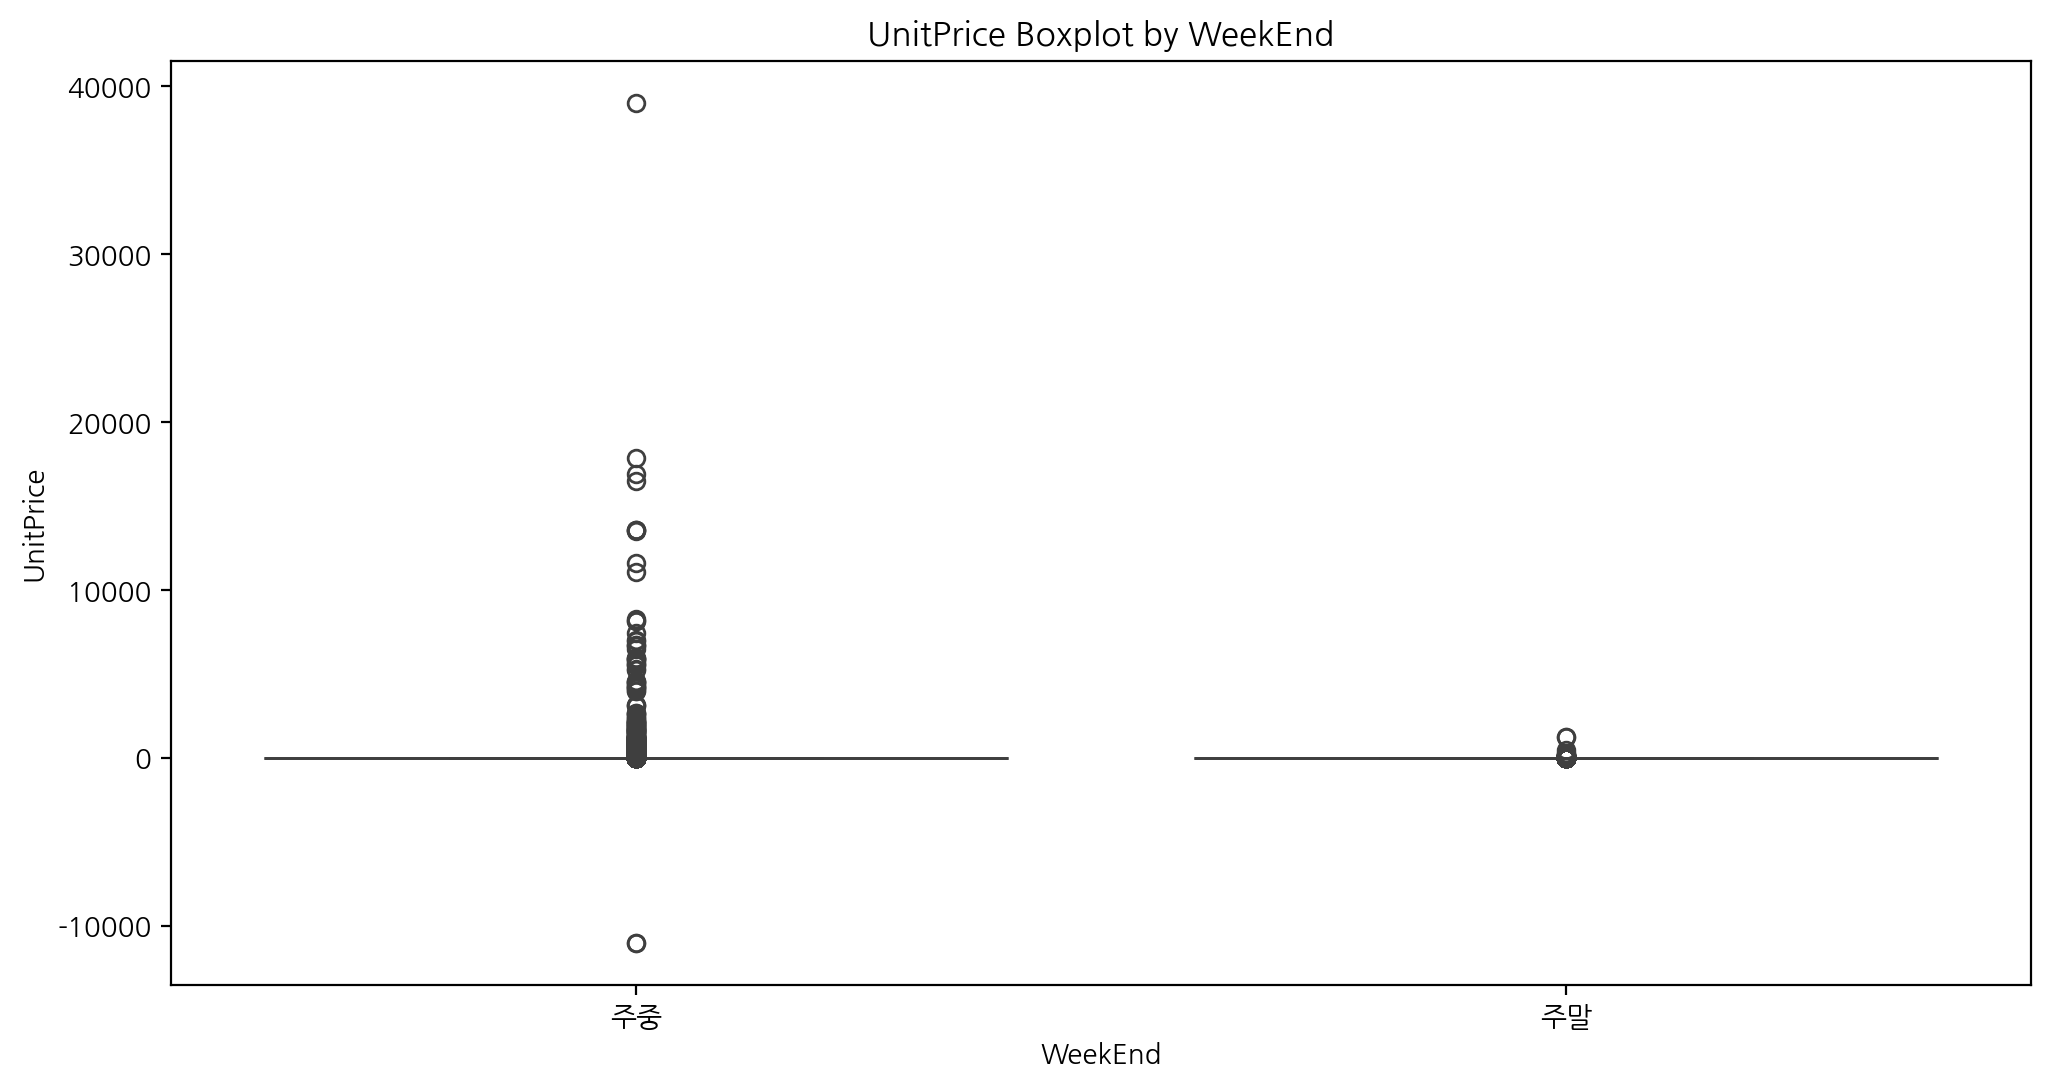

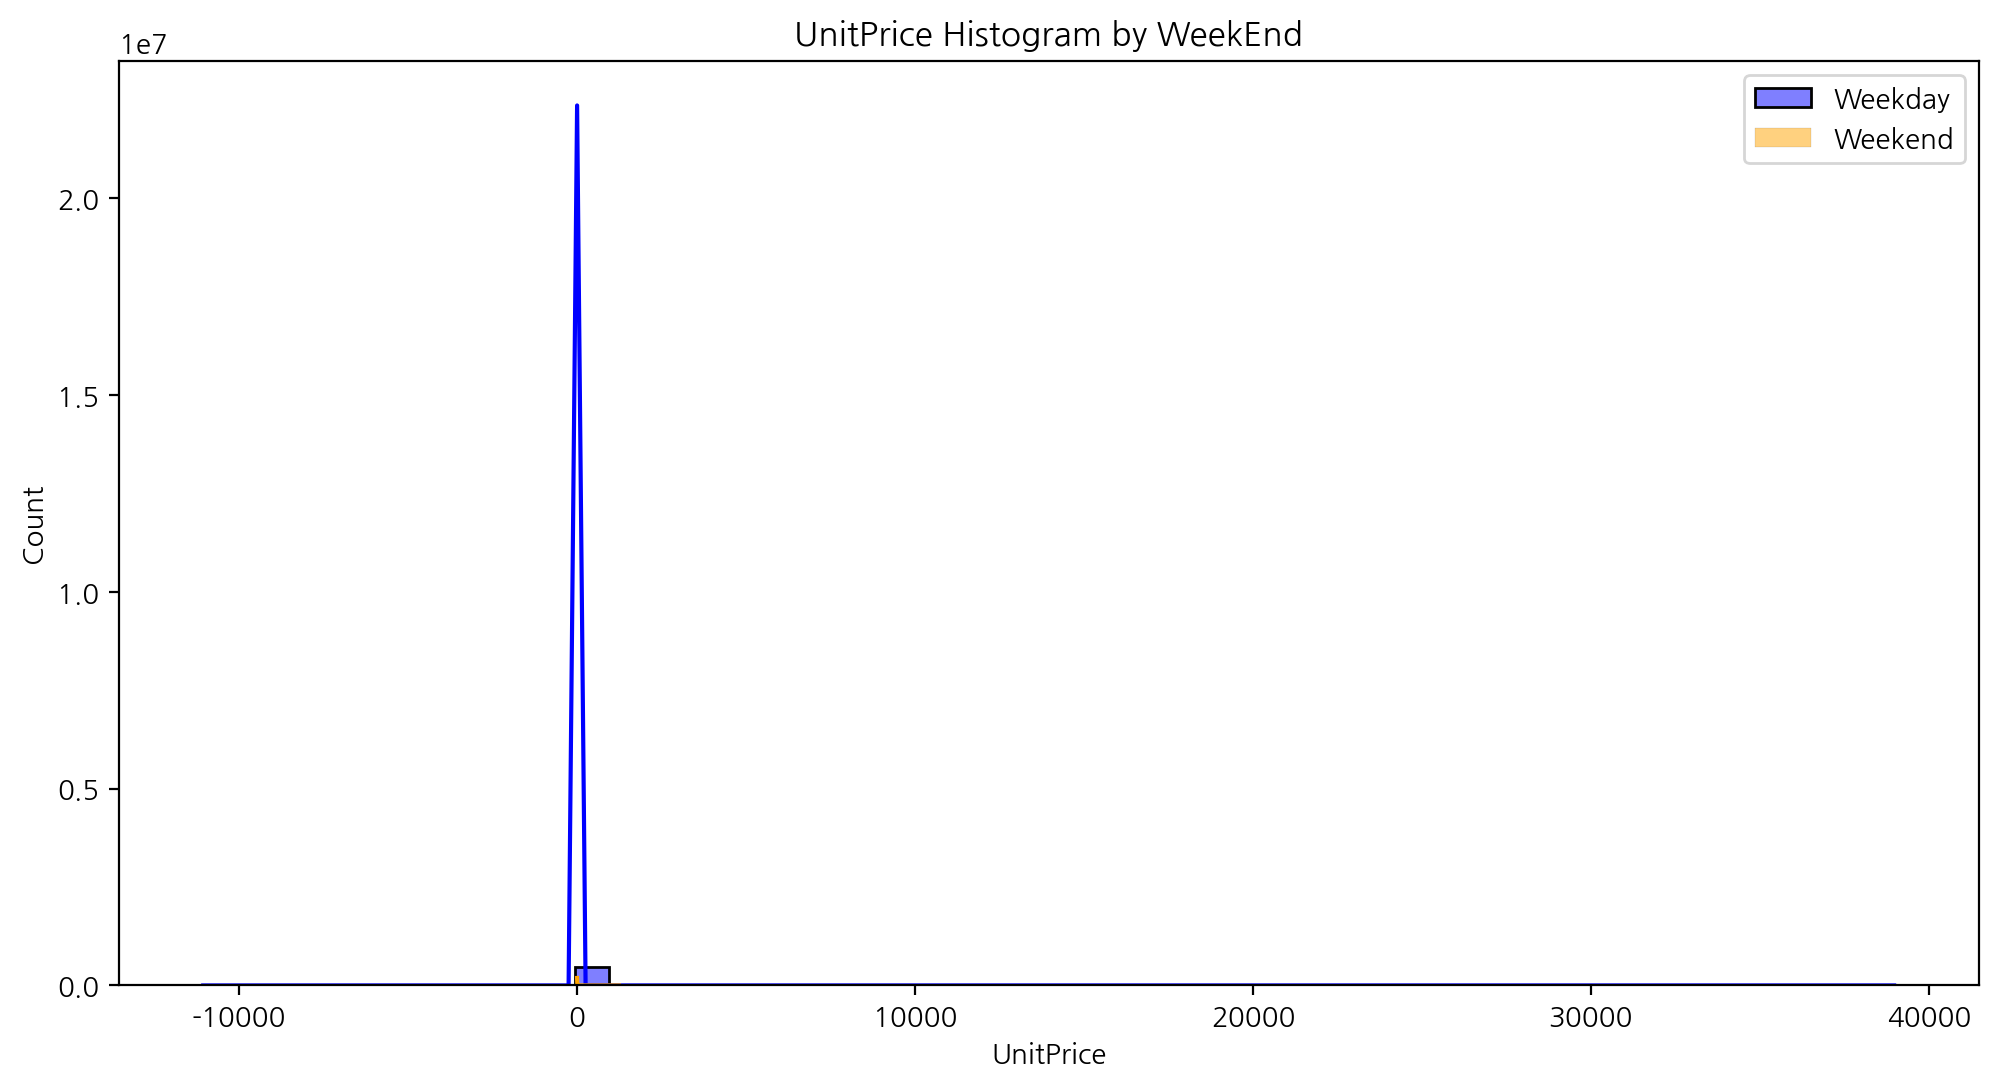

주중 UnitPrice 통계치
평균: 4.843425333065292
중간값: 2.1
표준편차: 103.03205776163102
분산: 10615.604926596072
분위수(25%, 50%, 75%): 0.25    1.25
0.50    2.10
0.75    4.13
Name: UnitPrice, dtype: float64

주말 UnitPrice 통계치
평균: 2.8878244815533978
중간값: 1.85
표준편차: 7.959497387498765
분산: 63.35359866159967
분위수(25%, 50%, 75%): 0.25    1.25
0.50    1.85
0.75    3.75
Name: UnitPrice, dtype: float64


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 'InvoiceDate' 컬럼을 datetime 형식으로 변환
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# 요일 정보 추가 (월요일=0, 화요일=1, ..., 일요일=6)
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek

# 'WeekEnd' 컬럼 추가: 주중과 주말 구분
df.loc[df['DayOfWeek'] <= 4, "WeekEnd"] = "주중"
df.loc[df['DayOfWeek'] > 4, "WeekEnd"] = "주말"

# 주중과 주말 데이터 분리
weekday_data = df[df['DayOfWeek'] <= 4]  # 주중
weekend_data = df[df['DayOfWeek'] > 4]   # 주말

# 주중과 주말의 UnitPrice 상자수염그림
plt.figure(figsize=(12, 6))
sns.boxplot(x='WeekEnd', y='UnitPrice', data=df)
plt.title('UnitPrice Boxplot by WeekEnd')
plt.show()

# 주중과 주말의 UnitPrice 히스토그램
plt.figure(figsize=(12, 6))
sns.histplot(weekday_data['UnitPrice'], kde=True, color='blue', label='Weekday', bins=50)
sns.histplot(weekend_data['UnitPrice'], kde=True, color='orange', label='Weekend', bins=50)
plt.legend()
plt.title('UnitPrice Histogram by WeekEnd')
plt.show()

# 주중 데이터에 대한 통계치 계산
weekday_mean = weekday_data['UnitPrice'].mean()
weekday_median = weekday_data['UnitPrice'].median()
weekday_std = weekday_data['UnitPrice'].std()
weekday_var = weekday_data['UnitPrice'].var()
weekday_quantiles = weekday_data['UnitPrice'].quantile([0.25, 0.5, 0.75])

# 주말 데이터에 대한 통계치 계산
weekend_mean = weekend_data['UnitPrice'].mean()
weekend_median = weekend_data['UnitPrice'].median()
weekend_std = weekend_data['UnitPrice'].std()
weekend_var = weekend_data['UnitPrice'].var()
weekend_quantiles = weekend_data['UnitPrice'].quantile([0.25, 0.5, 0.75])

# 결과 출력
print("주중 UnitPrice 통계치")
print(f"평균: {weekday_mean}")
print(f"중간값: {weekday_median}")
print(f"표준편차: {weekday_std}")
print(f"분산: {weekday_var}")
print(f"분위수(25%, 50%, 75%): {weekday_quantiles}")

print("\n주말 UnitPrice 통계치")
print(f"평균: {weekend_mean}")
print(f"중간값: {weekend_median}")
print(f"표준편차: {weekend_std}")
print(f"분산: {weekend_var}")
print(f"분위수(25%, 50%, 75%): {weekend_quantiles}")


## 데이터 분포 설명
히스토그램 그리는데 너무 오래걸려서 kde = False로도 해보고 그랬는데 주말 그래프가 안나와서 뭐지 했는데 그냥 주말이 쥐똥만한 크기였던 거였다..이게 맞나 싶긴한데 일단 결과를 설명하자면...
- 주중 UnitPrice의 평균이 약 4.84달러, 중간값은 2.1달러다. / 표준편차가 매우 크게 나타나는 걸 보아 주중 UnitPrice 값들이 평균을 중심으로 크게 흩어져 있음을 나타냄. / 사분위수를 보면 대부분의 데이터가 1.25달러에서 4.13달러 사이에 분포되어 있음
- 주말 UnitPrice 평균은 2.89달러, 중간값은 1.85달러. / 주중보다 평균과 중간값이 낮음 따라서 주말에는 낮은 가격대의 제품을 구매하는 경향이 있음을 알 수 있음. / 표준편차와 분산이 주중에 비해 작게 나타나는 것으로 보아 주말 UnitPrice 값들이 평균 주변에 더 집중되어 분포 되어 있음을 확인 가능. / 사분위수를 보면 대부분 1.25달러에서 3.75달러 사이에 분포되어 있지만 주중보단 낮은 가격대에 집중되어 있는 경향


## 미션4) 심슨의 역설을 설명하기 위한 구체적인 분석을 다음의 순서로 진행해 주세요.

심슨의 역설(Simpson's Paradox)은 통계 데이터를 해석할 때 발생할 수 있는 현상으로, 일부 하위 그룹에서 관찰된 추세가 전체 데이터를 합쳤을 때 반전될 수 있음을 나타냅니다. 이 현상은 복잡한 데이터에서 하위 그룹 간에 상이한 분포나 크기 때문에 발생할 수 있습니다.

심슨의 역설을 설명하기 위해서는, 데이터 내에서 서로 상반된 추세를 보이는 하위 그룹을 찾거나 생성해야 합니다. 예를 들어, 특정 상품의 판매량이나 단가가 국가별로 다른 추세를 보이는지, 혹은 특정 기간 동안의 판매 추세가 전체 기간 동안의 추세와 다른지 등을 분석할 수 있습니다.

데이터를 제시한 특정 국가로 하위 그룹으로 나눕니다.
각 하위 그룹에서 총 판매금액의 추세를 분석합니다.
전체 데이터셋에 대해 동일한 지표를 분석합니다.
하위 그룹의 추세와 전체 데이터의 추세가 서로 다른 방향성을 보일 경우, 이를 통해 심슨의 역설을 설명합니다.
이러한 분석을 위해, 데이터 내에서 적절한 변수와 하위 그룹을 선정하는 것이 중요합니다. 현재 제공된 데이터만으로는 심슨의 역설을 바로 설명할 수 있는 명확한 예시를 찾기 어려울 수 있지만, 데이터를 깊이 분석하면 관련 현상을 발견할 수도 있습니다.
이를 이용해 비즈니스에 어떻게 활용할 수 있을지도 설명해 주세요.

```python
country_group = ["Japan", "Hong Kong", "Singapore", "Lebanon", "Canada", "USA"]
```

In [12]:
# 필요한 칼럼 선택
df_m4 = df[['TotalPrice','Country']]

# 국가 그룹 선택
country_group = ["Japan", "Hong Kong", "Singapore", "Lebanon", "Canada", "USA"]

# 각 국가별 총 판매금액 계산
country_sales = {}
for country in country_group:
    total_sales = df[df['Country'] == country]['TotalPrice'].sum()
    country_sales[country] = total_sales

# 전체 데이터셋 총 판매금액 계산
total_sales_all = df['TotalPrice'].sum()

# 각 국가별 총 판매금액 출력
print("각 국가별 총 판매금액:")
for country, sales in country_sales.items():
    print(f"{country}: {sales}")

# 전체 데이터셋 총 판매금액 출력
print(f"\n전체 데이터셋 총 판매금액: {total_sales_all}")

# 각 국가별 판매금액 비율 계산
country_ratios = {}
for country, sales in country_sales.items():
    ratio = sales / total_sales_all
    country_ratios[country] = ratio

# 각 국가별 판매금액 비율 출력
print("\n각 국가별 판매금액 비율:")
for country, ratio in country_ratios.items():
    print(f"{country}: {ratio}")

각 국가별 총 판매금액:
Japan: 35340.619999999995
Hong Kong: 10117.04
Singapore: 9120.39
Lebanon: 1693.88
Canada: 3666.38
USA: 1730.92

전체 데이터셋 총 판매금액: 9747747.933999998

각 국가별 판매금액 비율:
Japan: 0.003625516400227425
Hong Kong: 0.001037884860021043
Singapore: 0.0009356407307361956
Lebanon: 0.00017377141996991654
Canada: 0.00037612585233269335
USA: 0.00017757127202300513


- Japan, Hong Kong, Singapore은 상대적으로 높은 판매금액 기록
- Lebanon, Canada, USA는 상대적 낮은 판매금액 기록
---
- Japan은 전체 판매의 약 0.0036%를 차지하여 가장 큰 비중 차치
- Hong Kong, Singapore은 각각 약 0.0010%, 0.0009%를 차지
- Labanon, Canada, USA는 각각 0.0004% 이하의 비율 차지
---
- 심슨의 역설

심슨의 역설은 하위 그룹 간의 추세가 전체 데이터를 합쳤을 때 반전될 수 있는 현상을 설명

이를 위해 각 국가 그룹을 하위 그룹으로 삼고, 전체 데이터와 비교

- 현재 가장 높은 판매금액을 기록하는 Japan과 낮은 USA가 있으나 특정 카테고리 또는 기간별로 보았을 땐 이 순위가 뒤바뀔 수 있다는 예시를 들 수 있을 것 같다.
- 특정 카테고리 별 또는 기간별로 봤을 때 가장 높은 국가와 기간을 연결시켜 어느 기간에 어떤 나라에서 가장 판매금액이 높은지를 알아서 마케팅 전략을 세우는 비즈니스 전략을 사용할 수 있을 것 같다.


## 미션5) 상품의 단가와 총 판매액의 관계를 분석해 주세요.

상품의 단가가 총 판매액에 미치는 영향을 이해하고 예측하는 것입니다. 이 분석은 가격 결정 전략을 개선하고, 수익성을 최대화하기 위해 사용될 수 있습니다.
높은 단가의 상품이 더 많은 총 판매액을 생성할 것이라는 가설을 설정합니다.

1) 데이터 전처리: 필요한 데이터를 정리하고, 결측치를 제거합니다.\
2) 단순 회귀분석: 단가(UnitPrice)를 독립변수로, 총 판매액(TotalPrice)을 종속변수로 설정하여 회귀분석을 수행합니다.\
3) 결과 해석: 회귀계수와 결정계수를 분석하여 상품 가격과 총 판매액 사이의 관계를 해석합니다.

In [13]:
# 데이터 전처리
# 결측치 처리
df_m5 = df[['UnitPrice', 'TotalPrice']]
df_m5 = df_m5.dropna()

In [14]:
df_m5.head()

,UnitPrice,TotalPrice
0,2.55,15.30
1,3.39,20.34
2,2.75,22.00
3,3.39,20.34
4,3.39,20.34


In [15]:
df_m5.isna().sum() # 결측치 제거 완료

UnitPrice     0
TotalPrice    0
dtype: int64

In [16]:
# 단순 회귀분석
import statsmodels.api as sm

# 독립변수와 종속변수
X = df_m5['UnitPrice']
Y = df_m5['TotalPrice']

# 회귀모델에 상수항 추가
X = sm.add_constant(X) # 이 함수는 독립변수 데이터프레임(X)에 상수항을 추가하여 회귀분석을 수행할 때 필요한 상수항을 포함한 데이터프레임을 반환함

# OLS 모델
model = sm.OLS(Y, X).fit()

# 회귀계수와 결정계수 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             TotalPrice   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                 1.461e+04
Date:                Tue, 16 Jul 2024   Prob (F-statistic):               0.00
Time:                        06:55:33   Log-Likelihood:            -3.9791e+06
No. Observations:              541909   AIC:                         7.958e+06
Df Residuals:                  541907   BIC:                         7.958e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.9128      0.508     41.137      0.0

## 결과 해석: 회귀계수와 결정계수를 분석하여 상품 가격과 총 판매액 사이의 관계를 해석
회귀분석 결과를 종합하면, UnitPrice가 TotalPrice에 음의 방향으로 유의미한 영향을 미침

즉, UnitPrice가 높을수록 TotalPrice는 감소하는 경향

그러나 모델 진단 결과, 잔차의 정규성 가정을 만족하지 않고 잔차의 비대칭성과 첨도도 높은 값을 보이므로 추가적인 모델 개선이 필요

## 미션6) 여러 분은 크리스마스가 온라인 소매 판매에 미치는 영향을 평가하고, 이를 바탕으로 더 효과적인 가격 및 프로모션 전략을 개발해야 합니다.  

* 다음과 같은 비즈니스 전략을 고려하여 인과 분석을 합니다. 증거의 사다리로 데이터에서 얻을 수 있는 증거의 강도를 평가합니다. 크리스마스 관련 상품과 비관련 상품 간의 판매 차이를 분석합니다.


* 프로모션 전략
    * 크리스마스 상품 프로모션 강화하여 크리스마스 관련 상품의 판매를 증진시키기 위한 특별 프로모션을 개발합니다.
    * 대상 고객을 세분화하여 크리스마스 상품에 관심이 높은 고객 세그먼트를 식별하고, 이들을 대상으로 한 마케팅 캠페인을 실행합니다.
* 재고 및 공급망 관리
    * 재고 최적화를 통해 크리스마스 시즌에 대한 수요 예측을 바탕으로 재고 수준을 조절합니다.
    * 공급망 효율화를 통해 시즌별 수요 변화에 따라 공급망을 조정하여 비용을 최소화하고, 고객 만족도를 높입니다.
* 상품 다양화
    * 상품 포트폴리오를 확장하여 크리스마스 관련 상품뿐만 아니라, 다른 시즌 상품에도 주목하여 상품 포트폴리오를 다양화합니다

* 크리스마스 시즌 동안 프로모션과 상품 가격 전략이 판매에 미치는 영향을 분석하여, 미래의 프로모션 및 가격 전략을 최적화해야 합니다.



* 다음 주어진 코드를 활용합니다.


```python
# 2011년 이전 데이터만 사용합니다.
# 프로모션 여부와 시간에 따른 데이터 분리
df_promotion = df[(df["InvoiceDate"] < "2011-01-01") & df["Description"].notnull()].dropna().copy()
df_promotion["IsChristmasPeriod"] = (df_promotion["InvoiceDate"] >= "2010-12-17") & (df_promotion["InvoiceDate"] <= "2010-12-24")
df_promotion["IsChristmasProduct"] = df_promotion["Description"].str.lower().str.contains("christmas")
```

In [17]:
# 데이터 전처리
# 2011년 이전 데이터만 사용합니다.
df_promotion = df[(df["InvoiceDate"] < "2011-01-01") & df["Description"].notnull()].dropna().copy()

# 크리스마스 기간 여부를 나타내는 컬럼 생성
df_promotion["IsChristmasPeriod"] = (df_promotion["InvoiceDate"] >= "2010-12-17") & (df_promotion["InvoiceDate"] <= "2010-12-24")

# 상품 설명에서 크리스마스 관련 단어를 포함하는지 여부를 나타내는 컬럼 생성
df_promotion["IsChristmasProduct"] = df_promotion["Description"].str.lower().str.contains("christmas")

In [18]:
# 크리스마스 관련 상품과 비관련 상품의 판매량 비교
christmas_sales = df_promotion[df_promotion["IsChristmasProduct"]]["TotalPrice"].sum()
non_christmas_sales = df_promotion[~df_promotion["IsChristmasProduct"]]["TotalPrice"].sum()

print(f"크리스마스 관련 상품 총 판매금액: {christmas_sales}")
print(f"비관련 상품 총 판매금액: {non_christmas_sales}")

# 크리스마스 기간 동안 판매된 상품 수
christmas_count = df_promotion[df_promotion["IsChristmasPeriod"]]["InvoiceNo"].nunique()
total_count = df_promotion["InvoiceNo"].nunique()

print(f"크리스마스 기간 동안 판매된 상품 수: {christmas_count}")
print(f"전체 기간 동안 판매된 상품 수: {total_count}")

# 크리스마스 관련 상품과 비관련 상품의 판매 증가율 계산
sales_increase_rate = (christmas_sales - non_christmas_sales) / non_christmas_sales * 100
print(f"크리스마스 관련 상품의 판매 증가율: {sales_increase_rate:.2f}%")

크리스마스 관련 상품 총 판매금액: 22165.59
비관련 상품 총 판매금액: 532438.4299999999
크리스마스 기간 동안 판매된 상품 수: 238
전체 기간 동안 판매된 상품 수: 1708
크리스마스 관련 상품의 판매 증가율: -95.84%


- 결과를 보면 크리스마스 관련 상품의 판매가 오히려 감소했음을 볼 수 있음, 크리스마스 관련 상품들이 비교적 낮은 판매를 기록

- 크리스마스 관련 상품 프로모션
  - 크리스마스 관련 상품의 판매량 증가를위해서 예를 들어 할인율을 더 높게 조정하거나 추가 혜택을 제공하여 프로모션을 진행할 수 있음

- 크리스마스 상품에 관심이 있는 고객층을 고객 세그먼트를 분석해서 특정 고객층을 타겟팅하여 마케팅 전략을 세우면 더 도움이 될 듯함
- 해당 시즌을 대비해서 재고를 준비하고 수요 예측을 통해서 재고를 알맞게 조정해야 함, 재고 부족 또는 재고 과다를 방지하여 고객 만족도를 높이고 자사의 손실을 방지하여야 함

## 미션7) 다변량 회귀분석을 수행하여 크리스마스 기간 전후와 크리스마스 관련 상품과 비관련 상품 간의 판매량(Quantity) 차이를 'UnitPrice'와 'Country'와 함께 분석합니다.

* 판매량(Quantity)을 종속변수로 하여, 크리스마스 관련 상품 여부(IsChristmasProduct), 단가(UnitPrice), 국가(Country) 등을 독립변수로 포함하는 다변량 선형 회귀모델을 구축합니다.
* statsmodels 라이브러리(statsmodels.formula.api 의 ols)를 사용하여 모델을 구축하고, 결과를 해석합니다.
* 분석 결과를 해석하고, 이를 바탕으로 크리스마스 시즌 판매 전략에 대한 권장 사항을 제시합니다.
* 분석 과정과 결과, 그리고 비즈니스 전략에 대한 권장 사항을 포함하는 보고서를 작성합니다.
* 다음 주어진 코드를 활용합니다.

```python
from statsmodels.formula.api import ols

# ols.summary()를 이용해 볼 수 있습니다.
```

In [19]:
from statsmodels.formula.api import ols

df['IsChristmasProduct'] = df['Description'].str.lower().str.contains('christmas')

# 모델 구축을 위해 데이터 선택
df_model = df[['Quantity', 'IsChristmasProduct', 'UnitPrice', 'Country']]

# 다변량 선형 회귀모델 구축
model = ols('Quantity ~ IsChristmasProduct + UnitPrice + Country', data = df_model).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     12.14
Date:                Tue, 16 Jul 2024   Prob (F-statistic):           5.53e-76
Time:                        06:55:51   Log-Likelihood:            -3.6767e+06
No. Observations:              540455   AIC:                         7.354e+06
Df Residuals:                  540415   BIC:                         7.354e+06
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

## 분석 결과 해석
- 크리스마스 관련 상품이 판매량에 긍정적인 영향 미침
- IsChristmasProduct[T.True]의 계수가 3.2149로 나타났고 규의수준에서 크리스마스 관련 상품이 판매량을 평균적으로 약 3.2149만큼 증가시킴을 의미
---
- 다양한 국가들에 따라 판매량 차이가 있음, United Kingdom에서의 판매량은 기준 국가로 설정한 경우 평균적으로 -57.8309만큼 낮음을 의미
---
- 상품의 단가가 판매량에 유의미한 영향을 미치진 않음
- 상품의 가격을 높이거나 낮추는 것은 판매량에 크게 변화를 미치지 않을 수 있다는 것
---
- 크리스마스 시즌에 크리스마스 관련 상품에 대한 프로모션을 강화함이 중요, 가격이 판매량에 유의미한 영향을 미치진 않으므로 크리스마스 관련 상품에 대한 인지도를 높이는 것이 중요하므로 다른 유명 캐릭터와 협업을 하여 크리스마스 관련 상품을 개발하거나 상품 자체에 고객들이 눈여겨볼만한 요소를 넣어 구성하는 것이 중요한 것으로 보임
- 국가별로 판매량 차이가 있기에 위의 결과를 반영하여 상품에 각 국가별 특성 또는 문화를 고려한 맞춤형 마케팅 전략이 필요함


### 여기서 든 의문점..
위에 문제에서 결과가 크리스마스 관련 상품 판매량이 줄었는데 근데 크리스마스 관련 상품이 판매량에 긍정적인 영향을 미친다는 말이 이게 맞나..?싶은 의문점이 들었다. 그래서 찾아보고 다시 결과를 보다가
다변량 회귀분석에서 크리스마스 관련 상품이 판매량에 긍정적인 영향을 미친다 나와있고 계수가 3.2149이고 유의수준 0.05에서 통계적으로 유의미하다는 결과를 얻는 p-value값이 0.022, 판매 상품 수로 보면 낮은 수치이다. 다변량 회귀분석에서 나온 결과는 크리스마스 관련 상품이 전반적으로 판매량을 증가시킨다는 평균적인 경향을 나타내지만 실제 크리스마스 기간 동안 판매되는 상품의 수가 적었다. 이는 이 분기 동안 특정 고객군이 다른 유형의 상품을 선호할 수 있다는 것을 의미할 수 있다.

## 미션8) 온라인 소매 데이터를 사용하여 고객이 특정 상품을 구매할지 여부를 예측합니다.
이 예측 모델을 사용하여 타겟 마케팅 전략을 수립하고, 재고 관리를 최적화합니다. 고객의 특정 상품 구매 여부(구매/미구매)를 예측하는 이진 분류 모델을 구축합니다.


1) 타겟 변수 생성: 'WHITE HANGING HEART T-LIGHT HOLDER' 상품을 구매했는지 여부를 나타내는 이진 타겟 변수(0: 미구매, 1: 구매)를 생성합니다.\
2) 특성(feature) 선택: 구매 예측에 영향을 미칠 수 있는 변수들을 선택합니다. 예를 들어, 'UnitPrice', 'Quantity', 'CustomerID', 'Country' 등이 될 수 있습니다.\
3) 범주형 변수 처리: 'Country'와 같은 범주형 변수를 숫자로 변환합니다. 원-핫 인코딩 등을 사용할 수 있습니다.\
4) 데이터 분할: 모델 학습을 위해 데이터를 훈련 세트와 테스트 세트로 분할합니다.\
5) 로지스틱 회귀 모델 생성 및 학습합니다.\
6) 모델을 평가 합니다.

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# 타겟 변수 생성
df['IsPurchased'] = df['Description'].apply(lambda x:1 if x == 'WHITE HANGING HEART T-LIGHT HOLDER' else 0)

# 필요한 변수 선택
features = ['UnitPrice', 'Quantity', 'CustomerID', 'Country']
df_selected = df[features + ['IsPurchased']]

# 범주형 변수 처리
# 결측지 제거
df_selected.dropna(inplace = True)

# 원핫인코딩
df_encoded = pd.get_dummies(df_selected, columns=['Country'])

# 데이터 분할
# 특성과 타겟 변수 분리
X = df_encoded.drop('IsPurchased', axis = 1)
y = df_encoded['IsPurchased']

# 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# 로지스틱 회귀 모델 생성 및 학습
model = LogisticRegression(max_iter = 10000)
model.fit(X_train, y_train)

# 모델 예측
y_pred = model.predict(X_test)

# 평가 지표
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# 결과 출력
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
# 결과가...엥...

<ipython-input-20-45876ae94ddb>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.dropna(inplace = True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.9947152373227146
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score, precision_recall_curve, auc
from imblearn.over_sampling import SMOTE

# 타겟 변수 생성
df['IsPurchased'] = df['Description'].apply(lambda x: 1 if x == 'WHITE HANGING HEART T-LIGHT HOLDER' else 0)

# 필요한 변수 선택
features = ['UnitPrice', 'Quantity', 'CustomerID', 'Country']
df_selected = df[features + ['IsPurchased']]

# 결측치 제거
df_selected = df_selected.dropna()

# 원핫 인코딩
df_encoded = pd.get_dummies(df_selected, columns=['Country'])

# 데이터 분할
# 특성과 타겟 변수 분리
X = df_encoded.drop('IsPurchased', axis=1)
y = df_encoded['IsPurchased']

# 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SMOTE를 사용한 오버샘플링
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# 로지스틱 회귀 모델 생성 및 학습
model = LogisticRegression(max_iter=10000)
model.fit(X_train_res, y_train_res)

# 모델 예측
y_pred = model.predict(X_test)

# 평가 지표
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=1)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# 결과 출력
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.22693754147924194
Precision: 0.006774147704842963
Recall: 0.9976744186046511
F1 Score: 0.013456923728414814


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc

# 랜덤 포레스트 모델 생성 및 학습
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_res, y_train_res)

# 모델 예측
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# 평가 지표
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)
precision_rf_curve, recall_rf_curve, _ = precision_recall_curve(y_test, y_prob_rf)
pr_auc_rf = auc(recall_rf_curve, precision_rf_curve)

# 결과 출력
print(f'Random Forest - Accuracy: {accuracy_rf}')
print(f'Random Forest - Precision: {precision_rf}')
print(f'Random Forest - Recall: {recall_rf}')
print(f'Random Forest - F1 Score: {f1_rf}')
print(f'Random Forest - ROC-AUC: {roc_auc_rf}')
print(f'Random Forest - PR-AUC: {pr_auc_rf}')

Random Forest - Accuracy: 0.9804955386770887
Random Forest - Precision: 0.1409062693978895
Random Forest - Recall: 0.5279069767441861
Random Forest - F1 Score: 0.2224399804017638
Random Forest - ROC-AUC: 0.8929747247897276
Random Forest - PR-AUC: 0.2265965852106626


In [26]:
from xgboost import XGBClassifier

# XGBoost 모델 생성 및 학습
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_res, y_train_res)

# 모델 예측
y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

# 평가 지표
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_prob_xgb)
precision_xgb_curve, recall_xgb_curve, _ = precision_recall_curve(y_test, y_prob_xgb)
pr_auc_xgb = auc(recall_xgb_curve, precision_xgb_curve)

# 결과 출력
print(f'XGBoost - Accuracy: {accuracy_xgb}')
print(f'XGBoost - Precision: {precision_xgb}')
print(f'XGBoost - Recall: {recall_xgb}')
print(f'XGBoost - F1 Score: {f1_xgb}')
print(f'XGBoost - ROC-AUC: {roc_auc_xgb}')
print(f'XGBoost - PR-AUC: {pr_auc_xgb}')

XGBoost - Accuracy: 0.9458496177764668
XGBoost - Precision: 0.0828787242971045
XGBoost - Recall: 0.9186046511627907
XGBoost - F1 Score: 0.15204003079291764
XGBoost - ROC-AUC: 0.9786155613048266
XGBoost - PR-AUC: 0.2155540316793899


In [ ]:
# from sklearn.model_selection import GridSearchCV

# # 랜덤 포레스트 하이퍼파라미터 설정
# param_grid_rf = {
#     'n_estimators': [100, 200],
#     'max_depth': [10, 20, None],
#     'min_samples_split': [2, 5],
#     'min_samples_leaf': [1, 2]
# }

# # 그리드 서치 수행
# grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=3, scoring='f1', n_jobs=-1)
# grid_search_rf.fit(X_train_res, y_train_res)

# # 최적 하이퍼파라미터 출력
# print(f'Best parameters for Random Forest: {grid_search_rf.best_params_}')

# # 최적 모델로 재학습
# best_rf_model = grid_search_rf.best_estimator_
# best_rf_model.fit(X_train_res, y_train_res)

In [ ]:
# # XGBoost 하이퍼파라미터 설정
# param_grid_xgb = {
#     'n_estimators': [100, 200],
#     'max_depth': [3, 6, 10],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'subsample': [0.8, 1.0],
#     'colsample_bytree': [0.8, 1.0]
# }

# # 그리드 서치 수행
# grid_search_xgb = GridSearchCV(xgb_model, param_grid_xgb, cv=3, scoring='f1', n_jobs=-1)
# grid_search_xgb.fit(X_train_res, y_train_res)

# # 최적 하이퍼파라미터 출력
# print(f'Best parameters for XGBoost: {grid_search_xgb.best_params_}')

# # 최적 모델로 재학습
# best_xgb_model = grid_search_xgb.best_estimator_
# best_xgb_model.fit(X_train_res, y_train_res)

In [ ]:
# # 최적 랜덤 포레스트 모델 평가
# y_pred_best_rf = best_rf_model.predict(X_test)
# y_prob_best_rf = best_rf_model.predict_proba(X_test)[:, 1]

# accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
# precision_best_rf = precision_score(y_test, y_pred_best_rf)
# recall_best_rf = recall_score(y_test, y_pred_best_rf)
# f1_best_rf = f1_score(y_test, y_pred_best_rf)
# roc_auc_best_rf = roc_auc_score(y_test, y_prob_best_rf)
# precision_best_rf_curve, recall_best_rf_curve, _ = precision_recall_curve(y_test, y_prob_best_rf)
# pr_auc_best_rf = auc(recall_best_rf_curve, precision_best_rf_curve)

# print(f'Optimized Random Forest - Accuracy: {accuracy_best_rf}')
# print(f'Optimized Random Forest - Precision: {precision_best_rf}')
# print(f'Optimized Random Forest - Recall: {recall_best_rf}')
# print(f'Optimized Random Forest - F1 Score: {f1_best_rf}')
# print(f'Optimized Random Forest - ROC-AUC: {roc_auc_best_rf}')
# print(f'Optimized Random Forest - PR-AUC: {pr_auc_best_rf}')

# # 최적 XGBoost 모델 평가
# y_pred_best_xgb = best_xgb_model.predict(X_test)
# y_prob_best_xgb = best_xgb_model.predict_proba(X_test)[:, 1]

# accuracy_best_xgb = accuracy_score(y_test, y_pred_best_xgb)
# precision_best_xgb = precision_score(y_test, y_pred_best_xgb)
# recall_best_xgb = recall_score(y_test, y_pred_best_xgb)
# f1_best_xgb = f1_score(y_test, y_pred_best_xgb)
# roc_auc_best_xgb = roc_auc_score(y_test, y_prob_best_xgb)
# precision_best_xgb_curve, recall_best_xgb_curve, _ = precision_recall_curve(y_test, y_prob_best_xgb)
# pr_auc_best_xgb = auc(recall_best_xgb_curve, precision_best_xgb_curve)

# print(f'Optimized XGBoost - Accuracy: {accuracy_best_xgb}')
# print(f'Optimized XGBoost - Precision: {precision_best_xgb}')
# print(f'Optimized XGBoost - Recall: {recall_best_xgb}')
# print(f'Optimized XGBoost - F1 Score: {f1_best_xgb}')
# print(f'Optimized XGBoost - ROC-AUC: {roc_auc_best_xgb}')
# print(f'Optimized XGBoost - PR-AUC: {pr_auc_best_xgb}')

## 결과
- 처음 코드를 돌렸을 때 데이터 불균형이 심해서 오버샘플링 SMOTE를 써서 다시 코드를 돌렸다.
- Accuracy: 0.22693754147924194 / Precision: 0.006774147704842963 / Recall: 0.9976744186046511 / F1 Score: 0.013456923728414814 이런 결과가 나왔고 조금더 성능을 향상시킬까 해서 다른 분류 알고리즘을 써서 성능 비교, 하이퍼파라미터 튜닝을 해보려 했다
- 랜덤 포레스트랑 XGBoost를 써봤는데 랜덤 포레스트가 시간이 오래 걸리긴 했지만 그래도 결과가 나왔고 XGBoost는 더 빠르게 결과가 나왔다. 그런데 하이퍼파라미터는 너무너무 시간이 오래걸려서 결국 돌리지 않았음
- 데이터셋의 불균형을 고려해서 성능 지표에서도 ROC-AUC와 같은 지표 사용
- 해서 ROC-AUC가 가장 높게 나온 XGBoost, 0.9786155613048266로 모델의 분류 성능이 높은 값을 보임
- 결론은 이 분석을 통해서 WHITE HAVGING HEART-T-LIGHT HOLDER 상품 구매 여부를 예측하는 모델을 구축했고,  타겟 마케팅 전략과 재고 관리 권장


## 회고
분석을 하고 그걸 토대로 비즈니스적 전략을 생각하는게 조금 낯설긴 했지만 내 생각과 판단으로 나온 것을 적어내려가는 과정이 재미있었던 것 같다. 분석 결과를 글로 쓰는과정에서 쓰다보니 너무 장황하게 쓰거나 너무 함축해서 써져서..이것저것 손보느라 조금 시간이 걸렸다,,고친다고 고쳐봤지만 잘 고쳐졌는진 잘 모르겠다ㅜ그리고 최근 판다스를 좀 이것저것 찾아보기도 하고 코딩 실력이 많이 부족한 것 같아 구글링도 해보고 공부하고 있었어서 함수들을 써서 해봤는데 조금 더 알아보기 쉽게 코드 짜는게 나았으려나 싶긴하다. 모델 성능 예측하는 부분에서 여러 모델을 써보고 하이퍼파라미터튜닝도 해보고 싶었는데 너무 오래걸리고 시간이 없어서 할 수 있는 걸 충분히 다 못해본 것 같아 아쉽다..오늘은 시간 조정에 실패했다. 문제에 나온 개념들도 제대로 찾아보고 함수도 찾아보고 분석 결과와 비즈니스 전략 고민을 오래 하느라 시간을 많이 써버렸다ㅜ다음엔 더 효율적으로 분석하려고 해야겠다!